# Cardio Finess Data Analysis

## Summary

Retail store, Cardio Good Fitness, sells three different treadmills. This data includes information supplied by customers who bought one of the three different treadmills offered. The data contains the following variables:
1. Product - the model number of the treadmill
2. Age - of the customer (years)
3. Gender - of the customer
4. Education - of the customer, in number of years
5. Marital status - of the customer
6. Usage - Average number of times the customer <i>wants</i> to use the tread mill every week
7. Fitness - Self rated fitness score of customer upon time of purchase (5 == very fit, 1 == very unfit)
8. Income - of the customer
9. Miles - Expected to run by the customer

## Purpose

Cardio Good Fitness wants to expand their customer base by targeting new customers. <b>Explore the dataset to find potential customer profiles the company may want to target.</b>

In [1]:
"""Import packages required for the analysis"""
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
"""Import dataset. Change types for from object to categorical for categorical data. 
Check for null values that may need to be addressed."""
# Import data into a dataframe
data = pd.read_csv('CardioGoodFitness.csv')
df = data.copy()

# Adjust dtypes so categorical data is known as categorical
ls = ['Product', 'Gender', 'MaritalStatus'] 
for i in ls:
    df[i] = df[i].astype('category')

# Check for any null values in the dataset
print(df.isnull().sum())
df.info()


Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


- Dataset has 3 categorial variables: 
> 1. Product
> 2. Gender
> 3. Marital Status

- As well as 6 quantitative variables (that are discrete):
> 1. Age 
> 2. Education
> 3. Usage
> 4. Fitness
> 5. Income
> 6. Miles

<b> The dataset has no null values so not cleaning or replacement is required </b>
<br>

## Data Exploration


In [3]:
"""Examine generalized stats for all variables"""
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


#### Notes:
 - There are three different types of treadmills customers have purchased in this dataset.
 - The oldest customer is 50, while the youngest is 18. Average customer is ~29, with the IQR between 24 and 33.
 - Most customers are male, however, not by a drastic amount (104/180).
 - Most customers have a college degree or at least some college education (IQR between 14 - 16).
 - Most customers are married, but again not by a drastic amount (107/180 partnereed).
 - Most customers, planned to use the treadmill 3 or more times per week (IQR 3 - 4).
 - Most customers view themselves as in decent shape or better upon purchase of a treadmill (IQR 3 - 4).
 - Most customers customers have an income of ~45,000 dollars or greater (IQR 44k - 59k)
 - Most customers beleieve they will run at least 66 miles on the treadmill (IQR 66 - 115)

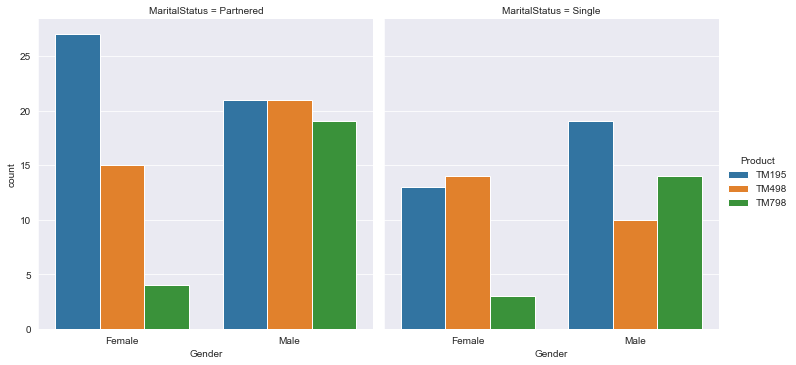

In [4]:
# Plot count plots of the categorical data to look for differences in product purchased related to Gender or Marital Status
sns.catplot(data=df, x='Gender', col='MaritalStatus', hue='Product', kind='count')
plt.savefig('Categorical_CatPlot.jpeg', dpi=300, bbox_inches='tight')

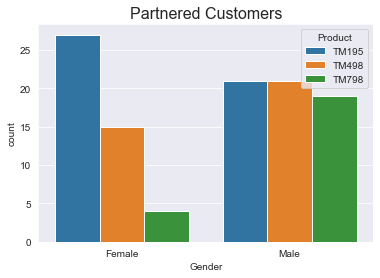

In [5]:
# Plot single graph for use in presentaion
sns.countplot(data=df[df['MaritalStatus'] == 'Partnered'], x='Gender', hue='Product').set_title('Partnered Customers', fontdict={'fontsize':16})
plt.savefig('PartneredCustomers_ByGender.jpeg', dpi=300, bbox_inches='tight')


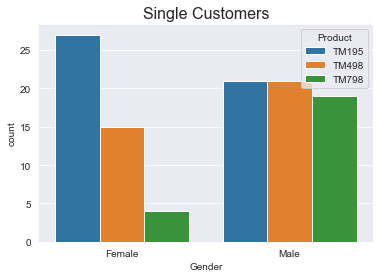

In [6]:
# Plot single graph for use in presentation
sns.countplot(data=df[df['MaritalStatus'] == 'Partnered'], x='Gender', hue='Product').set_title('Single Customers', fontdict={'fontsize':16})
plt.savefig('PartneredCustomers_ByGender.jpeg', dpi=300, bbox_inches='tight')

- There is litte difference in preference for the *TM195* or *TM498* with regards to **Gender**.
- Females are much less likely to buy the *TM798* than males.
- There are not obvious differences in preference for products with regards to **Marital Status**.

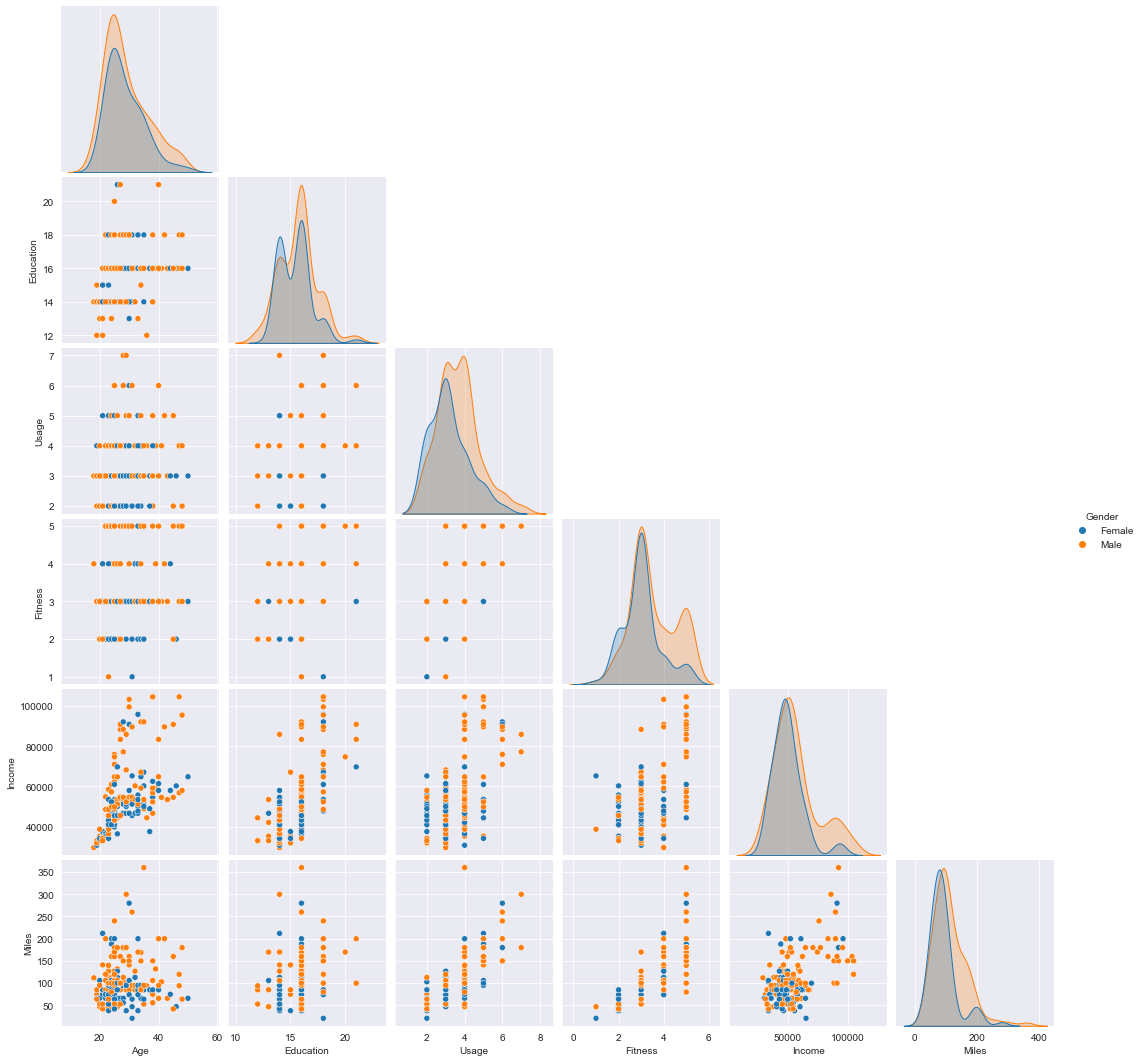

In [7]:
"""Examine numerical data for trend in both uinivatiate bivariate relationships with regards to each categorical variable"""
# Distributions and relationships with regards to Gender
sns.pairplot(df, hue='Gender', corner=True)

 - <b> There is little difference in the distribution of any quantititive variable with respect to <i>Gender</i>.</b>

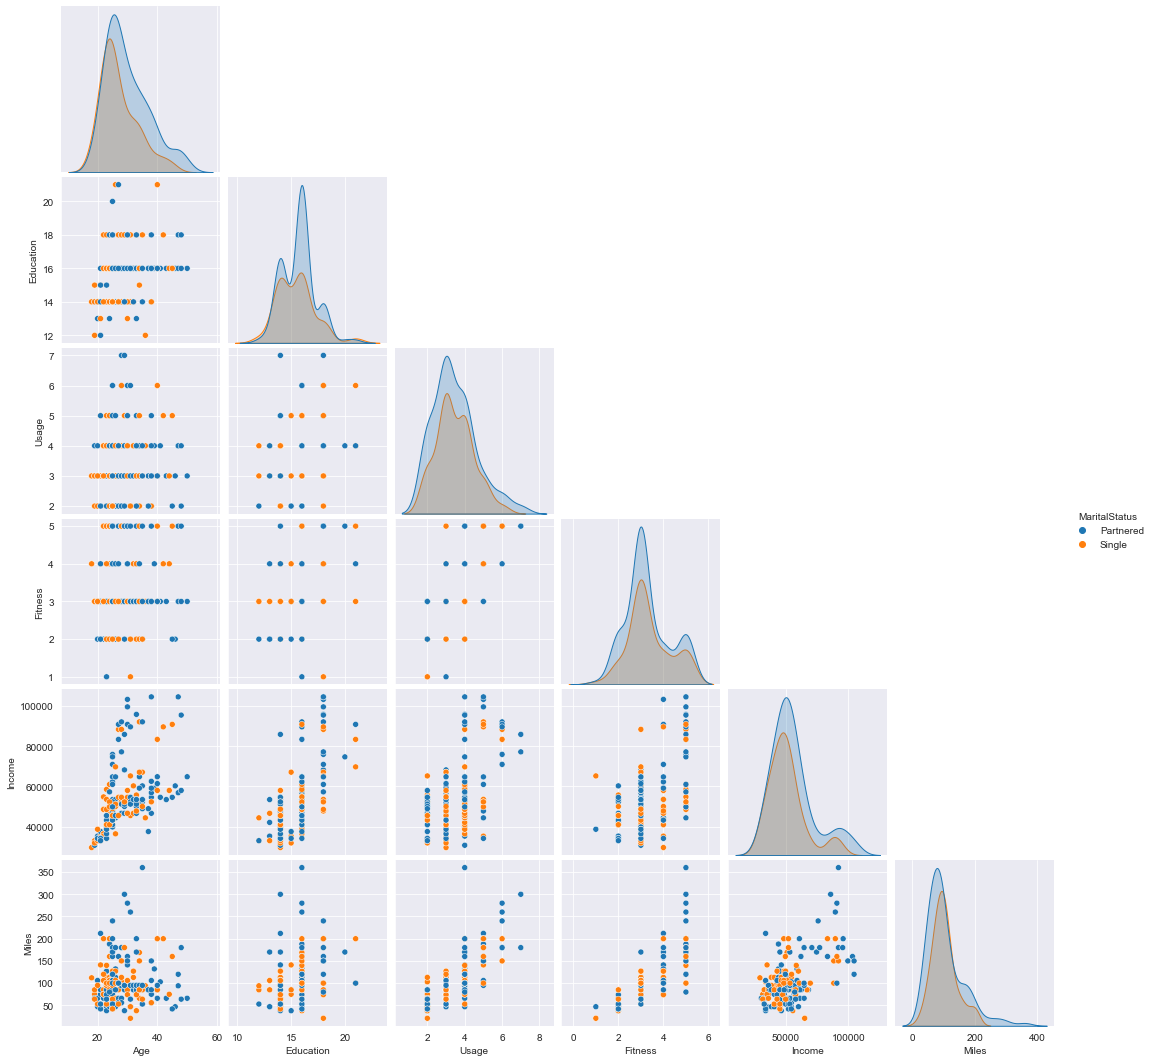

In [8]:
# Distributions and relationships with regards to Marital Status
sns.pairplot(df, hue='MaritalStatus', corner=True)

  - <b> There is little difference in the distribution of any quantititive variable with respect to <i>Marital Status</i>.</b>

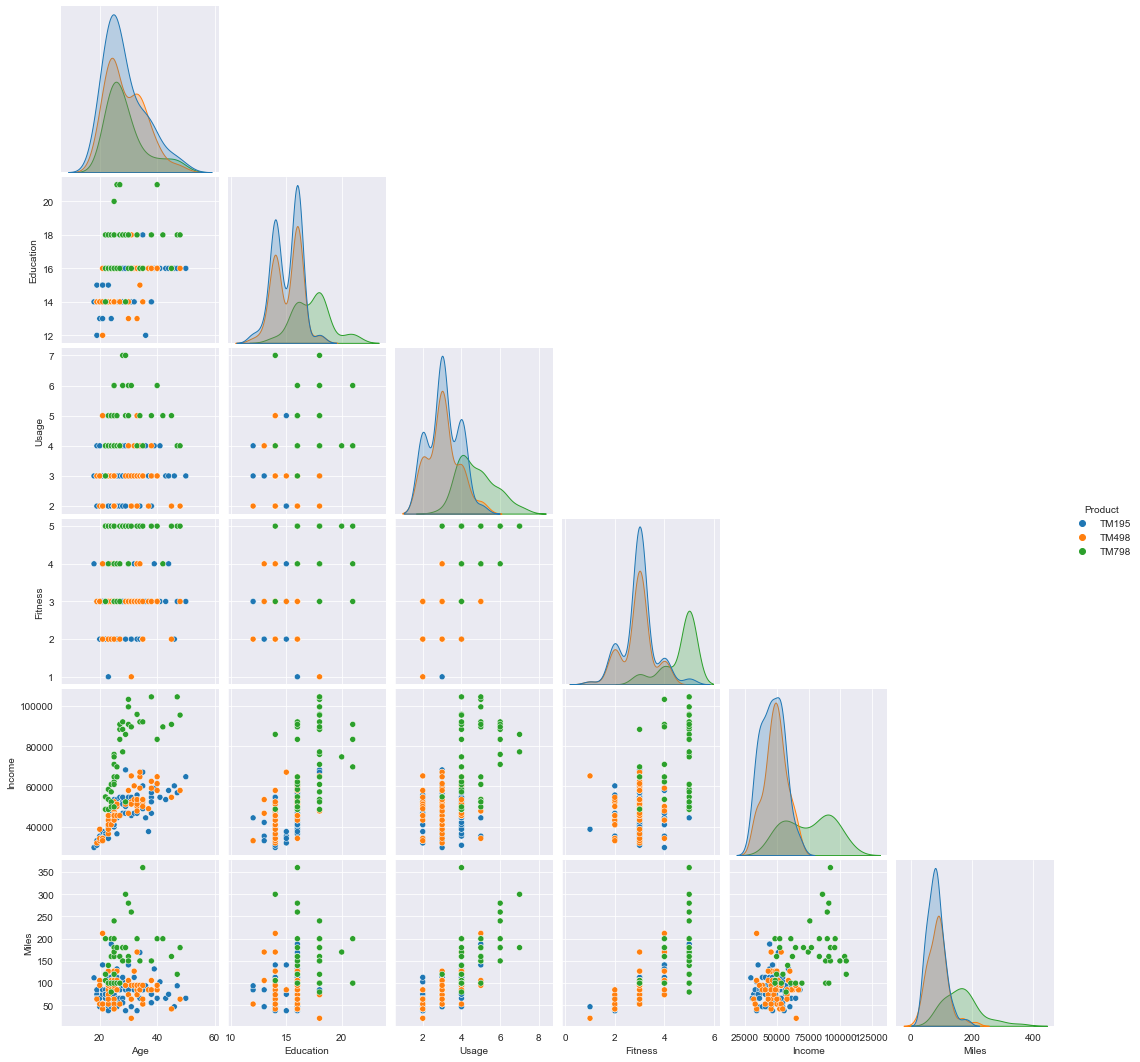

In [9]:
# Distributions and relationships with regards to Product
sns.pairplot(df, hue='Product', corner=True)

 - <b> There is little difference in the distribution of <i>Age</i> with respect to <i>Product</i>.</b>
 - <b> There may be significant differences in the distribution of all other quantitative variables with respect to <i>Product</i>. </b>
     - **Age** and **Income** may lead to selection of *TM798* over the other two products. This may also be true for **Usage**, **Fitness**, and **Miles**.
     - There appears to be little difference across the variables between choosing *TM195* or *TM498* treadmill.


<AxesSubplot:>

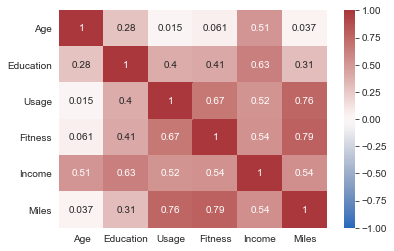

In [10]:
"""Examine the numerical variables for correlations"""
sns.heatmap(df.corr(), cmap='vlag', vmin=-1, vmax=1, annot=True)

#### Notes:
 - There are no negative correlations; all are positive.
 - The strongest correlation is between <i>Miles</i> and <i>Fitness</i> (Pearson r = 0.79).
 - The 2nd strongest correlation is between <i>Usage</i> and <i>Miles</i> (Pearson r = 0.76).
 - The 3rd strongest correlation is between <i>Usage</i> and <i>Fitness</i> (Pearson r = 0.67).
 - The weakest correlation is between <i>Age</i> and <i>Usage</i> (Pearson r = 0.015).
 
---
### Conclusions based on data exploration
 - <b>Age</b> can be discarded as a highly relavant parameter. It has low correlations with all self reported parameter except for Education and Income, which are likely correlated due to economic and societal factors that have little to do with interest in purchasing a treadmill. <b> It is relevant that their prime range for customers appears to be between 24 - 33 years of age; with a minimum of 18 and maximum of 50.</b>
 - <b>Education</b> is also not a highly pertinant parameter. It has relatively equal and still low correlations with the other variables, with the exception of Income. However, Income is likely related to Education for economic and societal factors that have little to do with intereste in purchasing a treadmill. <b> It is important that the vast majority of their customers have had at least some (lower quartile = 14 years or 2 years) college education.</b>
 - <b>Income</b> has generally decent correlations with all the variable (all r values > 0.5). As this is likely a relavant parameter to purchasing a treadmill, this is logical. However, the lack of strength with any in particular suggest this may be due to colinearity within between the variables. <b> The lower quartile value for income being approx. \\$45,000 is pertinant information </b>.
 - <b> Usage, Fitness, and Miles </b> are all self reported values by the customer on intent with regards to the treadmill's use and their pereceptoin of their own fitness. All three are positively correlated to each other and are the strongest correlations in the dataset.
 - For the categorical variables there do not appear to be significant differences in the quantitative data based on **Gender** or **Marital Status**. There are differences with regards to **Product**. Specifically, it appears that customers who purchase the most expensive treadmill, *TM798*, may be different than those who buy either of the other two.
 ---
 ## Analysis
 Use bar graphs to examine how customers who purchase *TM798* may be different as well as test if customers who purchase both *TM498* and *TM195* are analogous.
 

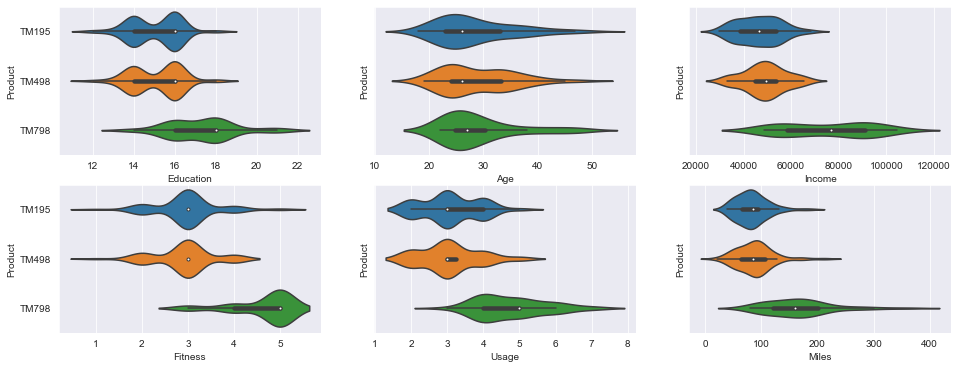

In [11]:
# Plot the distibutions by product to visually show how customers of TM798 are different by most parameters
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,6), sharey=True)
sns.violinplot(data = df, x='Education', y='Product', ax=ax[0,0])
sns.violinplot(data = df, x='Age', y='Product', ax=ax[0,1])
sns.violinplot(data = df, x='Income', y='Product', ax=ax[0,2])
sns.violinplot(data = df, x='Fitness', y='Product', ax=ax[1,0])
sns.violinplot(data = df, x='Usage', y='Product', ax=ax[1,1])
sns.violinplot(data = df, x='Miles', y='Product', ax=ax[1,2])
plt.savefig('Figures\CustomerDemo_ByModel.jpeg', dpi=300, bbox_inches='tight')

Customers who purchased the *TM798* treadmill tend to plan to use the treadmill more often, run further, view themselves to be in better shape, and have higher incomes.

In addition, there is little difference in the customer base for either the *TM195* or *TM498* treadmills.

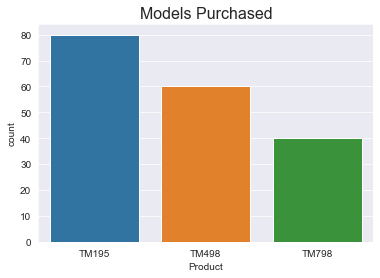

In [12]:
# Count plot of models purchased in this model for better understanding of percentages of each product purchased
sns.countplot(df['Product'])
plt.title('Models Purchased', fontdict={'fontsize':16})
plt.savefig('Figures\Models_Purchased.jpeg', dpi=300, bbox_inches='tight')

Of the three treadmills, the most frequently sold is the *TM195* at 80. However, the *TM498* is close behind at 60. This means that the primary customer base purchases these two cheaper versions which make up 140 of the 180 customers (78%) in this dataset.

In [13]:
"""Create a new column which categorizes each customer as 'Typical' or 'Atypical' based on what product they purchased.
Which here is a proxy for the differences in type of customer as a different type of customer most often buys the TM798."""
s = pd.Series(df['Product'].values).astype('object')
s.mask(s != 'TM798', other='Typical', inplace=True)
s.mask(s == 'TM798', other='Atypical', inplace=True)
df['Customer Type'] = s.astype('category')
df.info() #Checck dataframe change

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
 9   Customer Type  180 non-null    category
dtypes: category(4), int64(6)
memory usage: 9.8 KB


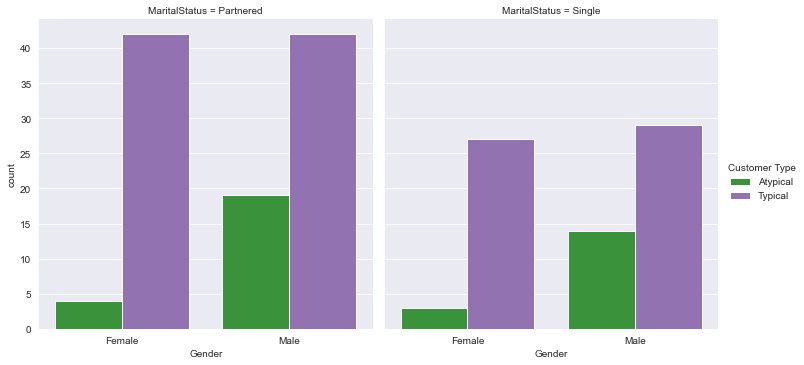

In [14]:
# Plot data based on Marital Status and Gender, but based on Customer Type as opposed to product purchased
sns_cmap = sns.color_palette().as_hex()
sns_green = sns_cmap[2]
sns_purple = sns_cmap[4]
customer_cmap = sns.color_palette([sns_green, sns_purple])

sns.catplot(data=df, x='Gender', col='MaritalStatus', hue='Customer Type', kind='count', palette=customer_cmap)
plt.savefig('Figures\GroupedCatPlot.jpeg', dpi=300, bbox_inches='tight')

- There are similar trends with regards to **Marital Status** between the typical customer and a typical.
- However, when it comes to **Gender**, atypical customers are much **more likely to be *male* than *female***.

In [15]:
# Examine descriptive stats for the Typical Customer
df[df['Customer Type'] == 'Typical'].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,28.700000,15.071429,3.078571,2.935714,47513.292857,84.992857
std,6.957941,1.215268,0.787198,0.648304,8956.226611,30.822186
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,23.000000,14.000000,3.000000,3.000000,40932.000000,64.000000
50%,26.000000,16.000000,3.000000,3.000000,46617.000000,85.000000
75%,33.000000,16.000000,4.000000,3.000000,53439.000000,95.000000
max,50.000000,18.000000,5.000000,5.000000,68220.000000,212.000000


In [16]:
# Examine the descriptive stats for the Atypical Customer
df[df['Customer Type'] == 'Atypical'].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000
mean,29.100000,17.325000,4.775000,4.625000,75441.57500,166.900000
std,6.971738,1.639066,0.946993,0.667467,18505.83672,60.066544
min,22.000000,14.000000,3.000000,3.000000,48556.00000,80.000000
25%,24.750000,16.000000,4.000000,4.000000,58204.75000,120.000000
50%,27.000000,18.000000,5.000000,5.000000,76568.50000,160.000000
75%,30.250000,18.000000,5.000000,5.000000,90886.00000,200.000000
max,48.000000,21.000000,7.000000,5.000000,104581.00000,360.000000


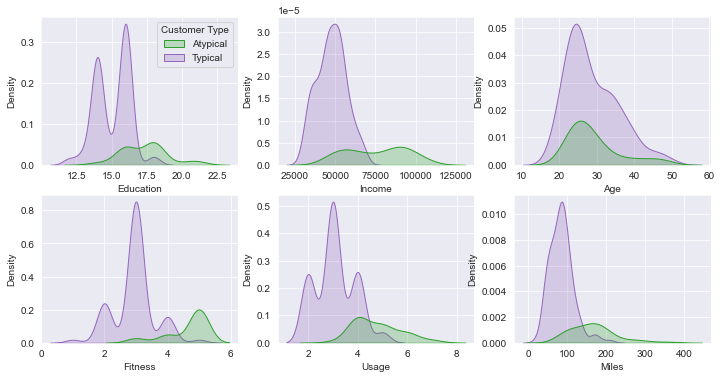

In [17]:
# Plot distributions of the two Customer types normalized as kernal density estimates (KDE's) for easier visual comparison
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,6))
sns.kdeplot(data=df, x='Education', hue='Customer Type', shade=True, palette=customer_cmap, ax=ax[0,0])
sns.kdeplot(data=df, x='Income', hue='Customer Type', shade=True, palette=customer_cmap, ax=ax[0,1], legend=False)
sns.kdeplot(data=df, x='Age', hue='Customer Type', shade=True, palette=customer_cmap, ax=ax[0,2], legend=False)
sns.kdeplot(data=df, x='Fitness', hue='Customer Type', shade=True, palette=customer_cmap, ax=ax[1,0], legend=False)
sns.kdeplot(data=df, x='Usage', hue='Customer Type', shade=True, palette=customer_cmap, ax=ax[1,1], legend=False)
sns.kdeplot(data=df, x='Miles', hue='Customer Type', shade=True, palette=customer_cmap, ax=ax[1,2], legend=False)

plt.savefig('Figures\GroupedNumDist.jpeg', dpi=300, bbox_inches='tight')


<AxesSubplot:xlabel='Age', ylabel='Customer Type'>

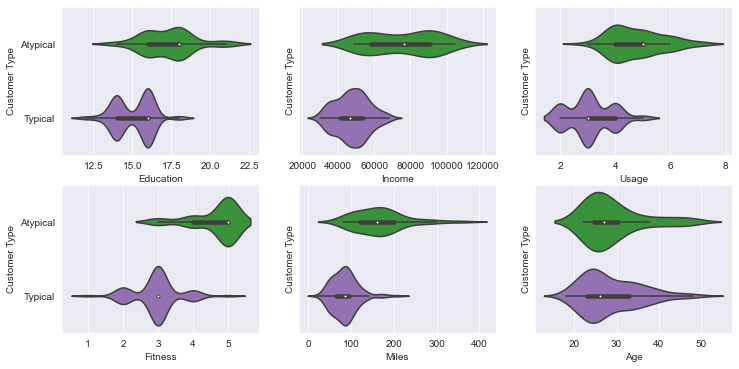

In [18]:
#Plot by Customer Type as a violin plot for box plot and kde perspective the differences in distribution
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,6), sharey=True)
sns.violinplot(data=df, x='Education', y='Customer Type', shade=True, palette=customer_cmap, ax=ax[0,0])
sns.violinplot(data=df, x='Income', y='Customer Type', shade=True, palette=customer_cmap, ax=ax[0,1])
sns.violinplot(data=df, x='Usage', y='Customer Type', shade=True, palette=customer_cmap, ax=ax[0,2])
sns.violinplot(data=df, x='Fitness', y='Customer Type', shade=True, palette=customer_cmap, ax=ax[1,0])
sns.violinplot(data=df, x='Miles', y='Customer Type', shade=True, palette=customer_cmap, ax=ax[1,1])
sns.violinplot(data=df, x='Age', y='Customer Type', shade=True, palette=customer_cmap, ax=ax[1,2])

**There is no significant difference in *Age* between the *Typical* and *Atypical* customer.**

## Conclusions

### Typical Customer - "*Hobbyist Runners*"
- Tend to have a College degree or some college education.
- Have a median income \\$47k, with a maximum of \\$70k.
- Typically plan to use the treadmill 3 times a week.
- Tend to think of themseleves as having a *Fitness* ranking of 3; not in shape, but also not out of shape.
- Plan to run 85 miles.

### Atypical Customer - "*Competitive Runners*"
- Most have at least a Masters and many at least 4 years of graduate or professional school education.
- Have a median income \\$77k, with a maximum of \\$105k.
- Typically plan to use the treadmill 5 times a week.
- Tend to think of themselves as have a *Fitness* ranking of 5; already in great shape.
- Plan to run 160 miles.
- Mostly male